In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("CombinedData.csv")
phages = pd.read_csv("SequencedPhages.csv")
#display(phages)
df = pd.merge(df, phages[['Phage Name', 'GC%', 'Temperate?', 'Genome Length(bp)', 'Accession #', 'End Type']], on=['Phage Name'])
#display(df)

In [45]:
correlation = df.corr(method='pearson')
display(correlation)

,Population Density,Year Found,pH,GHI,Dew Point,Albedo,Latitude,Longitude,AQI,PM25,PM10,CO_8H,NO2_1H,SO3_1H,GC%,Genome Length(bp)
Population Density,1.000000,0.017798,0.007916,-0.115222,-0.006195,-0.166587,0.070306,0.181089,0.121695,0.108511,0.110516,0.120116,0.104838,0.108427,0.016914,0.120127
Year Found,0.017798,1.000000,0.014201,0.007410,0.063542,0.006353,-0.051798,0.091783,-0.011158,0.001548,-0.000784,-0.008480,-0.009034,-0.008699,-0.027223,-0.067988
pH,0.007916,0.014201,1.000000,0.036262,-0.029506,0.008067,0.002010,-0.042176,0.037011,0.036354,0.035852,0.035187,0.036807,0.035880,0.013587,-0.031100
GHI,-0.115222,0.007410,0.036262,1.000000,0.492777,-0.570332,-0.842236,-0.575496,0.185265,0.175016,0.179957,0.184635,0.167673,0.183039,-0.039160,0.007190
Dew Point,-0.006195,0.063542,-0.029506,0.492777,1.000000,-0.719566,-0.831925,0.100285,0.097968,0.088149,0.090253,0.096426,0.091877,0.096366,-0.014536,0.012757
Albedo,-0.166587,0.006353,0.008067,-0.570332,-0.719566,1.000000,0.727373,0.067361,-0.358451,-0.332178,-0.338482,-0.356434,-0.328943,-0.344673,0.021174,-0.029600
Latitude,0.070306,-0.051798,0.002010,-0.842236,-0.831925,0.727373,1.000000,0.216033,-0.191950,-0.173240,-0.177345,-0.189376,-0.177641,-0.187441,0.032086,0.004087
Longitude,0.181089,0.091783,-0.042176,-0.575496,0.100285,0.067361,0.216033,1.000000,0.121045,0.104405,0.105415,0.120632,0.114940,0.111510,0.032885,0.001062
AQI,0.121695,-0.011158,0.037011,0.185265,0.097968,-0.358451,-0.191950,0.121045,1.000000,0.973415,0.983104,0.998727,0.953544,0.984196,0.005259,-0.028851
PM25,0.108511,0.001548,0.036354,0.175016,0.088149,-0.332178,-0.173240,0.104405,0.973415,1.000000,0.997520,0.975352,0.969638,0.989025,0.006306,-0.025657


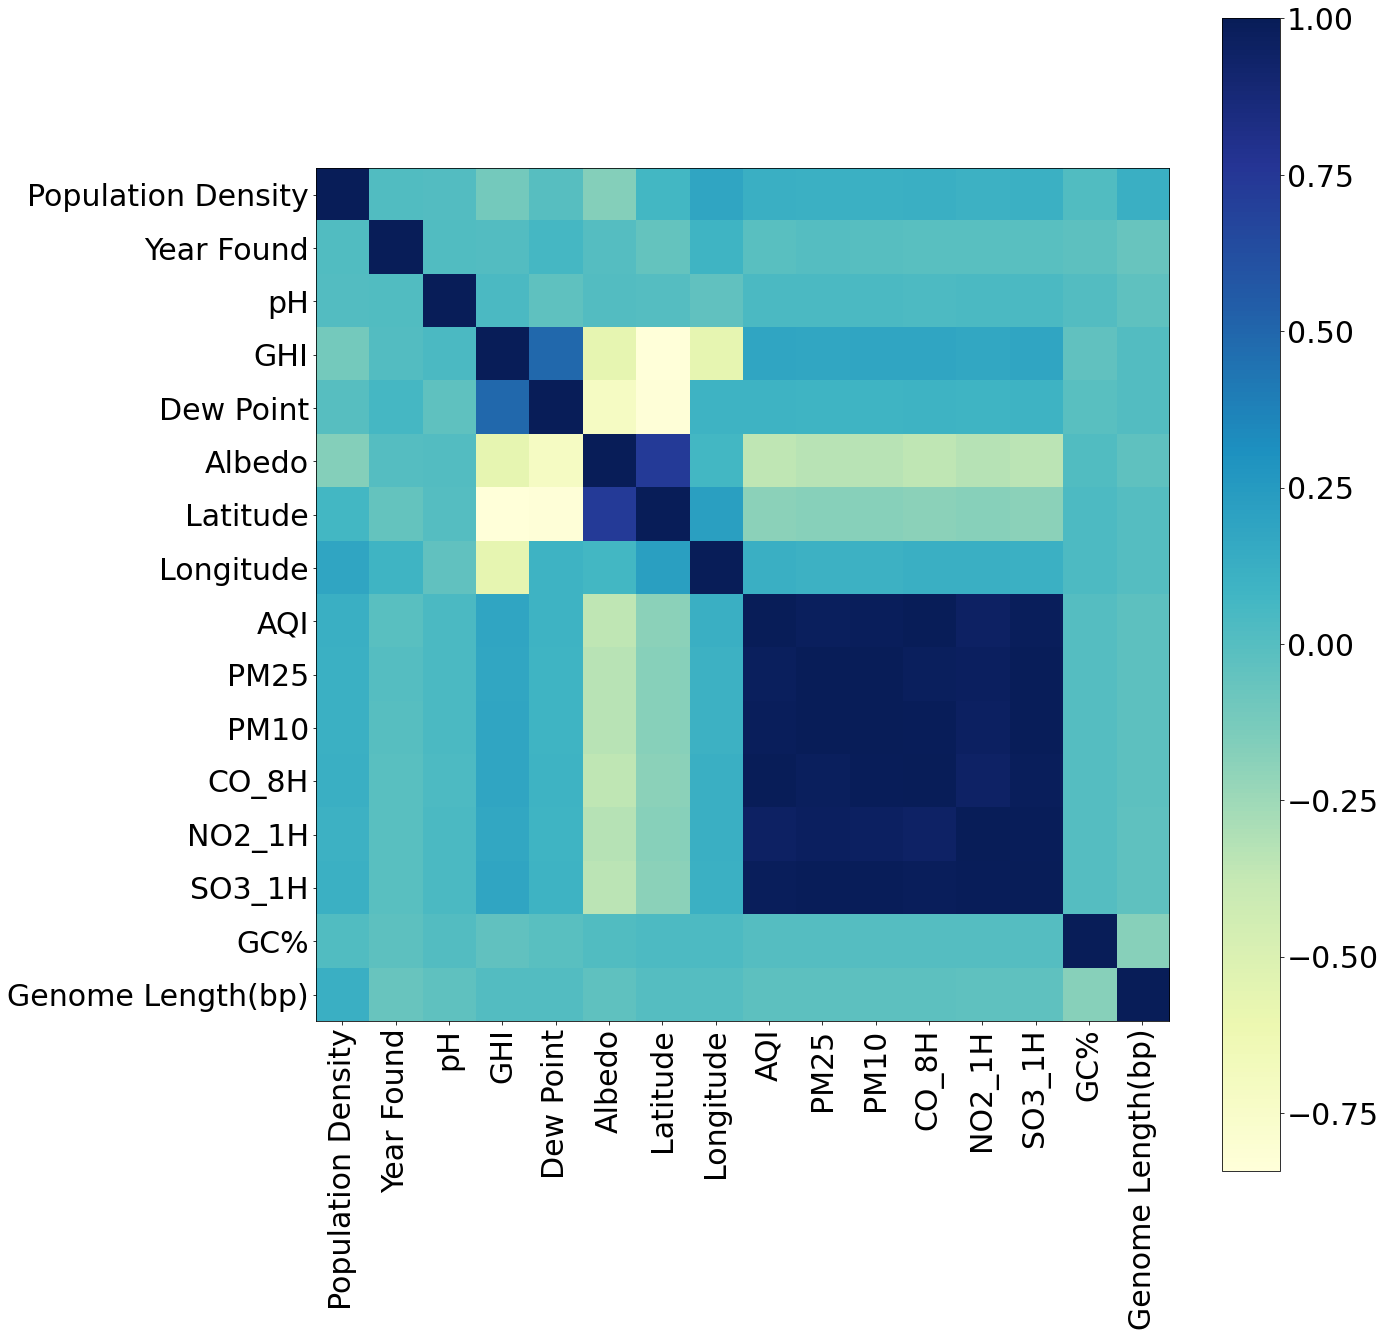

In [59]:
plt.imshow(correlation, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(correlation)),correlation.columns, rotation=90)
plt.yticks(range(len(correlation)),correlation.index)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams.update({'font.size': 30})
plt.savefig("Heatmap Enviornmental Factors.png")
plt.show()

In [22]:
correlation.to_csv("PearsonCorrelation.csv")

In [33]:
#df[df['Temperate?']=='FALSE'].median()

In [34]:
#df[df['Temperate?']=='FALSE'].median()

In [14]:


factor = 'Genome Length(bp)'

temperate = df[df['Temperate?']=='TRUE'].dropna(subset=[factor])
not_temperate = df[df['Temperate?']=='FALSE'].dropna(subset=[factor])

#ttest
stats.ttest_ind(temperate[factor], not_temperate[factor])

Ttest_indResult(statistic=-13.014367182981012, pvalue=1.2852143264549943e-37)

In [5]:
df.to_csv('CombinedData.csv', index=False)

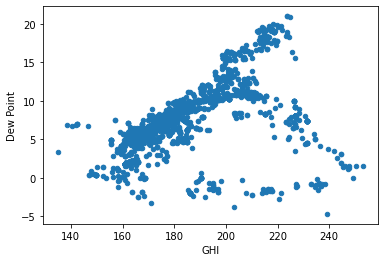

In [8]:
df.plot.scatter(x='GHI',y='Dew Point')

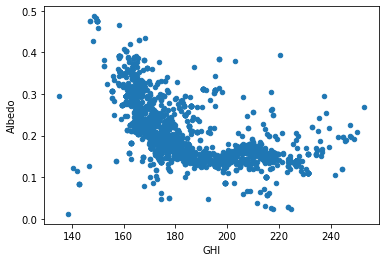

In [9]:
df.plot.scatter(x='GHI',y='Albedo')

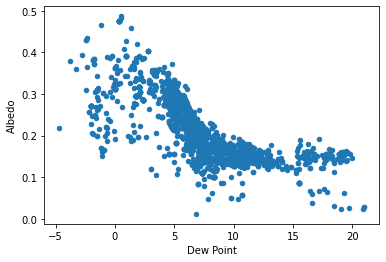

In [10]:
df.plot.scatter(x='Dew Point',y='Albedo')

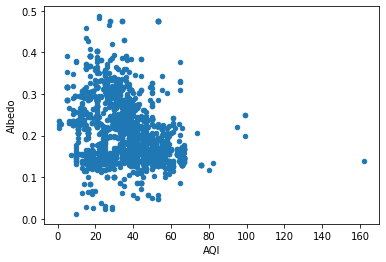

In [11]:
df.plot.scatter(x='AQI',y='Albedo')

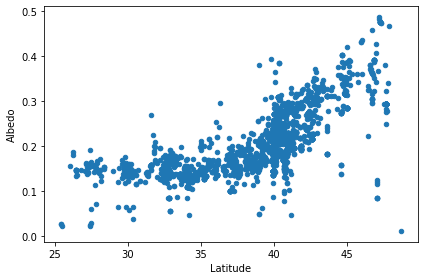

In [6]:
plot_latvsalbed = df.plot.scatter(x='Latitude',y='Albedo')
fig_latvsAlbedo = plot_latvsalbed.get_figure()
fig_latvsAlbedo.tight_layout()
fig_latvsAlbedo.savefig('Latitude vs Albedo')

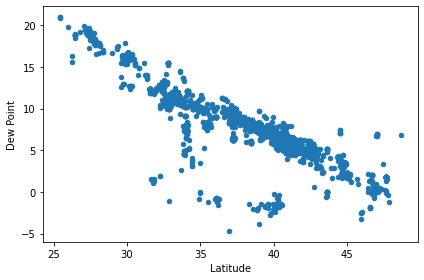

In [7]:
plot_latvsdew = df.plot.scatter(x='Latitude',y='Dew Point')
fig_latvsdew = plot_latvsdew.get_figure()
fig_latvsdew.tight_layout()
fig_latvsdew.savefig('Latitude vs Dew Point')

In [20]:
df[df["End Type"]=="3' Sticky Overhang"].median()

Population Density     1759.000000
Year Found             2015.000000
pH                        7.782413
GHI                     175.670548
Dew Point                 6.426256
Albedo                    0.197178
Latitude                 40.080000
Longitude               -83.013500
AQI                      38.000000
PM25                      9.100000
PM10                     41.000000
CO_8H                     3.300000
NO2_1H                   40.000000
SO3_1H                   26.000000
GC%                      63.700000
Genome Length(bp)     51696.000000
dtype: float64

In [21]:
df[df["End Type"]=="Circularly Permuted"].median()

Population Density     3070.000000
Year Found             2016.000000
pH                        7.788735
GHI                     174.196461
Dew Point                 6.315868
Albedo                    0.207288
Latitude                 40.105937
Longitude               -79.962857
AQI                      38.000000
PM25                      9.100000
PM10                     41.000000
CO_8H                     3.300000
NO2_1H                   40.000000
SO3_1H                   26.000000
GC%                      66.400000
Genome Length(bp)     68318.000000
dtype: float64

In [22]:
df[df["End Type"]=="Direct Terminal Repeat"].median()

Population Density     3941.000000
Year Found             2016.000000
pH                        7.786909
GHI                     174.354224
Dew Point                 6.463699
Albedo                    0.207370
Latitude                 40.128559
Longitude               -86.534229
AQI                      37.500000
PM25                      8.950000
PM10                     40.000000
CO_8H                     3.250000
NO2_1H                   39.500000
SO3_1H                   25.500000
GC%                      58.900000
Genome Length(bp)     75462.000000
dtype: float64

In [23]:
df[df["End Type"]=="Covalent Terminal Protein"].median()

Zipcode               18220.000000
Population Density     8691.500000
Year Found             2017.500000
pH                        7.843275
GHI                     165.319749
Dew Point                 6.244064
Albedo                    0.210630
Latitude                 40.447441
Longitude               -79.955997
AQI                      34.000000
PM25                      8.100000
PM10                     36.000000
CO_8H                     2.900000
NO2_1H                   36.000000
SO3_1H                   23.000000
GC%                      56.200000
Genome Length(bp)     19679.000000
dtype: float64

In [28]:
factor = 'Genome Length(bp)'

sticky_overhang = df[df["End Type"]=="3' Sticky Overhang"].dropna(subset=[factor])
circularly_permutated = df[df["End Type"]=="Circularly Permuted"].dropna(subset=[factor])
covalent_terminal = df[df["End Type"]=="Covalent Terminal Protein"].dropna(subset=[factor])
direct_terminal = df[df["End Type"]=="Direct Terminal Repeat"].dropna(subset=[factor])

#ANOVA
stats.f_oneway(sticky_overhang[factor], circularly_permutated[factor], covalent_terminal[factor], direct_terminal[factor])

F_onewayResult(statistic=229.6570038178226, pvalue=6.484390964678395e-133)

In [29]:
df[df["End Type"]=="3' Sticky Overhang"].mean()

Population Density     4869.063174
Year Found             2014.387097
pH                        7.762782
GHI                     181.820497
Dew Point                 7.202598
Albedo                    0.204339
Latitude                 38.756732
Longitude               -87.119127
AQI                      35.869440
PM25                      8.764934
PM10                     39.154824
CO_8H                     3.120046
NO2_1H                   37.454650
SO3_1H                   24.750433
GC%                      63.173510
Genome Length(bp)     53281.465692
dtype: float64

In [30]:
df[df["End Type"]=="Circularly Permuted"].mean()

Population Density     6572.212727
Year Found             2014.840112
pH                        7.761531
GHI                     179.698618
Dew Point                 6.928190
Albedo                    0.204558
Latitude                 39.077883
Longitude               -84.880034
AQI                      37.597964
PM25                      9.332824
PM10                     41.636132
CO_8H                     3.283333
NO2_1H                   39.229008
SO3_1H                   25.991094
GC%                      65.296989
Genome Length(bp)     76963.717691
dtype: float64

In [31]:
df[df["End Type"]=="Direct Terminal Repeat"].mean()

Population Density     8220.252336
Year Found             2016.333333
pH                        7.765138
GHI                     179.347625
Dew Point                 7.071376
Albedo                    0.205301
Latitude                 39.048116
Longitude               -87.204634
AQI                      35.867470
PM25                      8.822892
PM10                     39.307229
CO_8H                     3.118675
NO2_1H                   37.518072
SO3_1H                   24.734940
GC%                      56.360479
Genome Length(bp)     90569.892216
dtype: float64

In [32]:
df[df["End Type"]=="Covalent Terminal Protein"].mean()

Population Density     8691.500000
Year Found             2017.500000
pH                        7.843275
GHI                     169.007839
Dew Point                 5.355974
Albedo                    0.240046
Latitude                 41.513381
Longitude               -83.083525
AQI                      24.666667
PM25                      5.900000
PM10                     26.000000
CO_8H                     2.100000
NO2_1H                   26.000000
SO3_1H                   16.666667
GC%                      56.400000
Genome Length(bp)     74675.000000
dtype: float64

In [34]:
df.plot("End Type", 'Genome Length(bp)', kind='bar')

Error in callback <function flush_figures at 0x1236083b0> (for post_execute):


KeyboardInterrupt: 

In [4]:
df_endType = pd.read_csv("FINGenomeVEndType.csv")
df_endType.sort_values("Genome Length", inplace=True)

In [5]:
df_endType

,End Type,Genome Length
0,3' Sticky Overhang,53281.46569
3,Covalent Terminal Protein,74675.00000
1,Circularly Permuted,76963.71769
2,Direct Terminal Repeat,90569.89222


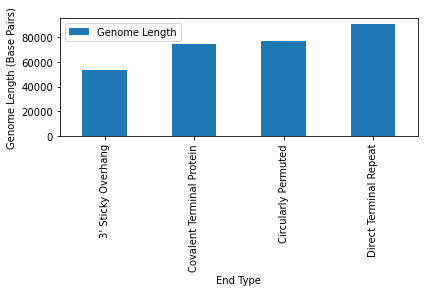

In [7]:
plot = df_endType.plot('End Type', 'Genome Length', kind='bar')
fig = plot.get_figure()
plt.ylabel("Genome Length (Base Pairs)")
fig.tight_layout()
fig.savefig("FIN EndType vs Genomelength.png")

In [51]:
fig.savefig('EndType.pdf')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [12]:
df[df['Temperate?']=='TRUE'].mean()

Population Density     5093.192015
Year Found             2013.986228
pH                        7.762204
GHI                     181.801581
Dew Point                 7.245241
Albedo                    0.203761
Latitude                 38.726046
Longitude               -87.398804
AQI                      35.615274
PM25                      8.729539
PM10                     38.945965
CO_8H                     3.096470
NO2_1H                   37.360951
SO3_1H                   24.644092
GC%                      64.066526
Genome Length(bp)     55752.168421
dtype: float64

In [13]:
df[df['Temperate?']=='FALSE'].mean()

Population Density     6078.415135
Year Found             2015.263291
pH                        7.763567
GHI                     180.969522
Dew Point                 7.019454
Albedo                    0.203609
Latitude                 38.908644
Longitude               -85.969372
AQI                      37.282859
PM25                      9.193082
PM10                     41.033051
CO_8H                     3.249808
NO2_1H                   38.930054
SO3_1H                   25.751729
GC%                      62.540091
Genome Length(bp)     69443.394856
dtype: float64

In [71]:
df_temperate = pd.read_csv("temperatethingy22.csv")
df_temperate.sort_values("Genome Length", inplace=True)

In [72]:
df_temperate.dropna()

,Temperateness,Genome Length
0,Temperate,55752.16842
1,Not Temperate,69443.39486


In [61]:
plot2 = df_temperate.plot('Temperateness', 'Genome Length', kind='bar')
fig = plot2.get_figure()
fig.yticks()
fig.savefig("Temperateness.png")

NameError: name 'df_temperate' is not defined

In [10]:
factor = 'AQI'

temperate = df[df['Temperate?']=='TRUE'].dropna(subset=[factor])
not_temperate = df[df['Temperate?']=='FALSE'].dropna(subset=[factor])

#ttest
stats.ttest_ind(temperate[factor], not_temperate[factor])

Ttest_indResult(statistic=-3.164659629862225, pvalue=0.0015700050962334)

In [11]:
factor = 'Population Density'

temperate = df[df['Temperate?']=='TRUE'].dropna(subset=[factor])
not_temperate = df[df['Temperate?']=='FALSE'].dropna(subset=[factor])

#ttest
stats.ttest_ind(temperate[factor], not_temperate[factor])

Ttest_indResult(statistic=-2.3733420671421945, pvalue=0.017723126383408148)

In [33]:
df_tempvsAQI = pd.read_csv("TempvsAQI.csv")
df_tempvsPop = pd.read_csv("TempvsPopdensity.csv")
df_tempvsAQI.sort_values("AQI", inplace=True)
df_tempvsPop.sort_values("Population Density", inplace=True)

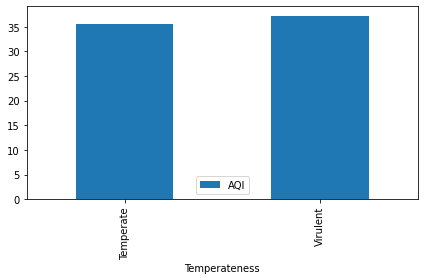

In [34]:
plot_tA = df_tempvsAQI.plot('Temperateness','AQI', kind = 'bar')
fig_tA = plot_tA.get_figure()
fig_tA.tight_layout()

In [37]:
df_tempvsPop

,Temperateness,Population Density
0,Temperate,5093.192015
1,Not Temerate,6078.415135


In [38]:
df_tempvsAQI

,Temperateness,AQI
0,Temperate,35.615274
1,Virulent,37.282859


In [3]:
df

,Phage Name,Zipcode,Population Density,County,Year Found,pH,Waterquality,GHI,Dew Point,Albedo,...,PM25,PM10,CO_8H,NO2_1H,SO3_1H,GC%,Temperate?,Genome Length(bp),Accession #,End Type
0,244,15260,NaN,Allegheny County,2004.0,7.450491,"Stable, normal stage",165.319749,6.244064,0.210630,...,8.4,37.0,3.0,37.0,24.0,63.4,TRUE,74483,DQ398041,3' Sticky Overhang
1,ABCat,6511,9041.0,New Haven County,2011.0,7.902840,Not applicable,171.776370,6.426256,0.195342,...,13.0,59.0,4.7,55.0,37.0,63.0,TRUE,76131,KF188414,3' Sticky Overhang
2,ABU,18107,NaN,Northampton County,2009.0,7.834701,"Stable, normal stage",170.401370,6.246461,0.234274,...,10.0,45.0,3.6,44.0,29.0,66.5,FALSE,68850,JF704091,Circularly Permuted
3,ACFishhook,66502,191.0,Riley County,2015.0,7.833908,"Stable, high stage",189.895320,6.363470,0.211507,...,5.7,25.0,2.1,25.0,16.0,64.0,TRUE,47343,MK284518,3' Sticky Overhang
4,AFIS,47907,NaN,Tippecanoe County,2014.0,7.755314,Not applicable,173.166324,6.472374,0.234082,...,2.8,12.0,1.0,12.0,8.0,63.7,TRUE,51737,MK359300,3' Sticky Overhang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,Zorro,17837,318.0,Union County,2015.0,7.704283,Not applicable,164.913356,5.622260,0.224630,...,7.6,34.0,2.8,33.0,22.0,61.1,FALSE,43562,MK279896,3' Sticky Overhang
2891,Zuko,63303,2309.0,Saint Charles County,2018.0,7.704380,Not applicable,181.154110,7.455525,0.181836,...,9.6,43.0,3.5,42.0,28.0,63.7,None,82302,MN204493,Circularly Permuted
2892,Zulu,89701,829.0,Carson City,2015.0,7.704335,Peak stage,217.424201,-1.417922,0.263644,...,6.0,27.0,2.2,26.0,17.0,61.4,TRUE,52499,MH779517,3' Sticky Overhang
2893,ZygoTaiga,55805,7223.0,Saint Louis County,2012.0,7.704623,Peak stage,NaN,NaN,NaN,...,4.0,18.0,1.4,18.0,11.0,64.7,FALSE,157204,KM881426,Circularly Permuted
